# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [11]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [8]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (3.2240017178507894, 0.19948806701039845)
1      (0.1802868242770587, 0.9138001258434608)
2       (1.2924752316808956, 0.524013613078844)
3    (0.052773353312183385, 0.9739584098057233)
4      (0.5884908652238218, 0.7450935987322339)
dtype: object

#### Interpret the normaltest results and make your observations.

In [9]:
# Explain the test results here
# Cuánto mayor sea el p-valor(segundo valor de la tupla), menor será el estadístico(más cercano a una distribución normal estándar)
# Se rechaza en todos los casos la hipótesis alternativa, puesto que el p-valor para todos los tests son mayores a 0.05

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

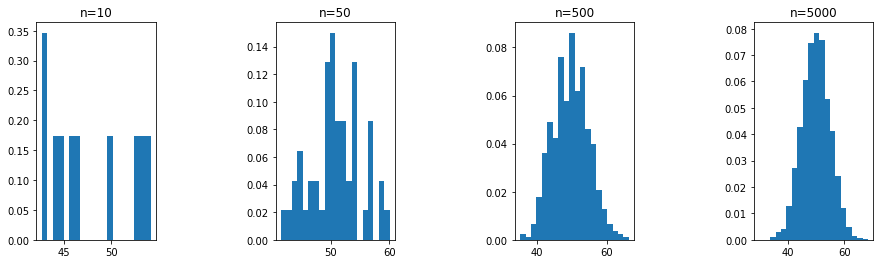

In [12]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# Cuánto mayor sea la muestra, según el teorema del límite central mayores son las posibilidades 
# que la distribución a una normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

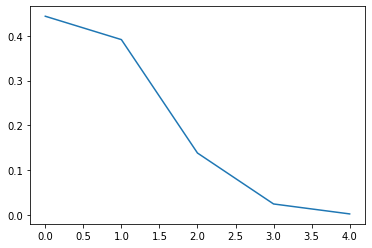

In [13]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [14]:
# Your comment here
# Es más probable que ninguna persona haga click en el anuncio (>40%) a que todas lo hagan(aprox. 0%) 


#### Now plot PMP with 50, 500, and 5000 visitors.

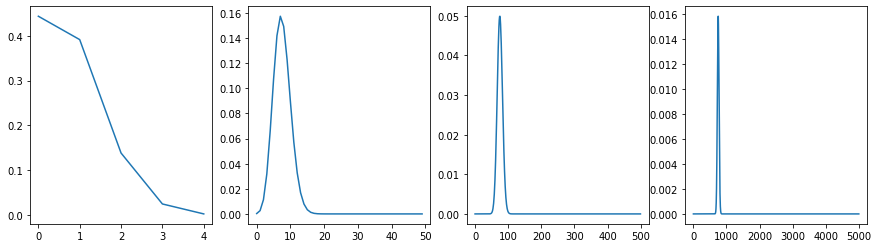

In [23]:
# Your code here
sample_size = [5,50, 500, 5000]
f, ax = plt.subplots(1, 4)
f.set_figwidth(15)
for i in range(0, 4):
    p = 0.15
    n=sample_size[i]
    x = range(n)
    dist = binom(n, p)
    ax[i].plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [25]:
# Your comment here
# La mayor probabilidad que hagan click en el anuncio es el tamaño de la muestra multiplicado por la media (15%)
# por lo que cuánto mayor sea la muestra, mayor será el número de personas que hacen click en el anuncio, y 
# cada vez es menor la probabilidad de que nadie haga click en el anuncio.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [30]:
# Your comment here
# La distribución de Poisson es aquella que mide la probabilidad que ocurra un evento un determinado número de veces.
# La probabilidad de que ocurra un evento es constante en el tiempo, y no pueden suceder dos eventos a la vez.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [28]:
# Your code here
scipy.stats.poisson.pmf(320,300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [29]:
# Your code here
scipy.stats.poisson.pmf(60,300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

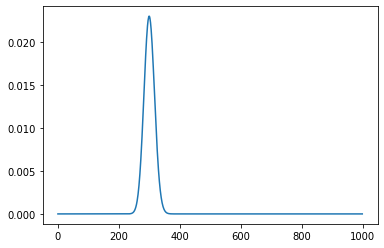

In [27]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)